In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [21]:


base_treino = pd.read_csv(r"D:\pipeline_dados\data_raw\base_orcamentos_treino.csv")

#base_avaliacao = pd.read_csv(r"D:\pipeline_dados\base_orcamentos_nov.csv")
base_treino

,id_quote,dt_criacao,dias_desejo,dias_em_casa,ds_tipo_obra,nm_prop_oportunidade,proprietario,promocional,convertido,tipo_loja,...,amb_outros,revestimento,officina,loucas_metais,arg_rejunte,categ_outros,vl_frete,vlr_orcamento,convertidos,nao_convertidos
0,0Q03s000000GRoxCAG,2022-06-09,203,534,Nova Obra,leticia silva de arruda,zzzzzzzXzzzzzXzzXzzzzzz,S,N,Tradicional A,...,S,7,2,0,8,0,153.33,76444.94,412,330
1,0Q03s000000GRsGCAW,2022-06-09,11,534,Nova Obra,leticia silva de arruda,zzzzzzzXzzzzzXzzXzzzzzz,S,S,Tradicional A,...,N,1,0,0,0,0,26.67,64.80,412,330
2,0Q03s000000GRwXCAW,2022-06-09,15,534,Nova Obra,fabiano martins werutsky,zzzzzzzXzzzzzzzXzzzzzzzz,S,N,Tradicional A,...,S,1,0,0,0,0,266.67,14763.62,343,438
3,0Q03s000000GS0UCAW,2022-06-09,30,534,Nova Obra,leticia silva de arruda,zzzzzzzXzzzzzXzzXzzzzzz,S,S,Tradicional A,...,S,1,0,0,4,0,66.67,1301.09,412,330
4,0Q03s000000GS1cCAG,2022-06-09,29,534,Reforma,rafaela de sousa paonessa loureiro,zzzzzzzXzzXzzzzzXzzzzzzzzXzzzzzzzz,S,N,Tradicional A,...,S,0,0,10,0,0,83.33,3276.30,342,406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5592,0Q03s000001mURcCAM,2023-10-17,24,39,Nova Obra,fabiano martins werutsky,zzzzzzzXzzzzzzzXzzzzzzzz,S,N,Tradicional A,...,S,1,0,0,4,0,93.33,1905.18,343,438
5593,0Q03s000001mUX1CAM,2023-10-17,1,39,Reforma,patricia agnes,zzzzzzzzXzzzzz,S,S,Tradicional A,...,S,1,0,0,0,0,60.00,131.27,348,503
5594,0Q03s000001mUdiCAE,2023-10-17,52,39,Nova Obra,juliana westphalen gonçalves,zzzzzzzXzzzzzzzzzzXzzzzzzzzz,S,N,Tradicional A,...,S,8,0,0,10,0,493.33,35609.59,488,538
5595,0Q03s000001mUh6CAE,2023-10-17,196,39,Reforma,matheus homrich,zzzzzzzXzzzzzzz,S,S,Tradicional A,...,S,7,4,0,18,0,576.45,27856.07,184,197


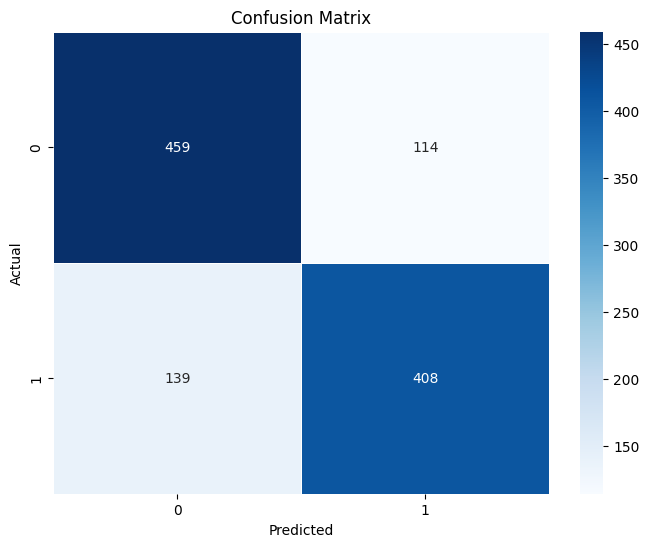


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78       573
           1       0.78      0.75      0.76       547

    accuracy                           0.77      1120
   macro avg       0.77      0.77      0.77      1120
weighted avg       0.77      0.77      0.77      1120

Acurácia no conjunto de teste: 77.41%


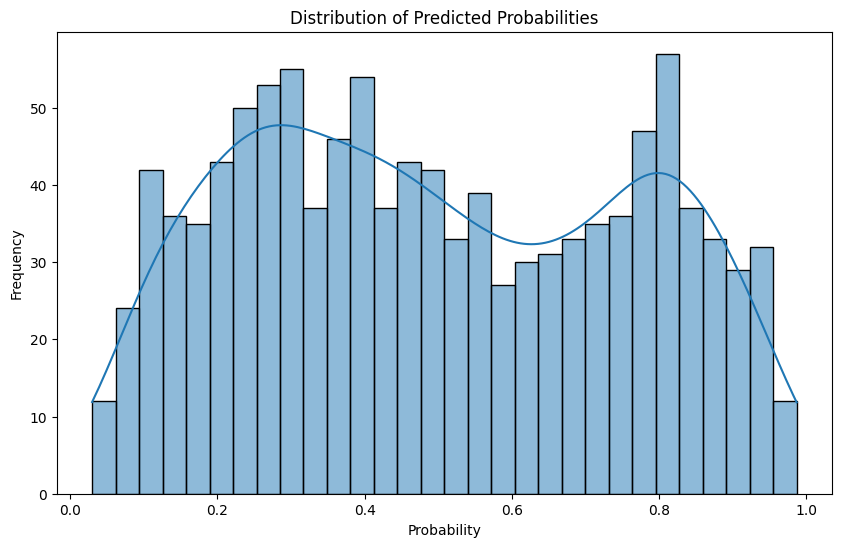

,id_quote,convertido,probabilidade_conversao
0,0Q03s000000GRoxCAG,0,0.888795
1,0Q03s000000GRsGCAW,0,0.093435
2,0Q03s000000GRwXCAW,0,0.448381
3,0Q03s000000GS0UCAW,1,0.447629
4,0Q03s000000GS1cCAG,1,0.643230
5,0Q03s000000GS97CAG,0,0.604767
6,0Q03s000000GSIiCAO,1,0.799956
7,0Q03s000000GSNOCA4,0,0.261009
8,0Q03s000000GSSnCAO,1,0.470470
9,0Q03s000000GSUACA4,0,0.482263


In [17]:



categoricos = ['id_quote', 'dt_criacao', 'ds_tipo_obra', 'nm_prop_oportunidade', 'proprietario', 'promocional',
               'tipo_loja', 'banheiro', 'toda_casa', 'cozinha', 'area_externa', 'itens_assentamento', 'sala',
               'piscina', 'area_servico', 'garagem', 'dormitorio', 'varanda', 'escada', 'amb_outros']


encoder = OneHotEncoder(drop='if_binary')
df_encoded = pd.DataFrame(encoder.fit_transform(base_treino[categoricos]).toarray(),
                          columns=encoder.get_feature_names_out(categoricos))
df_final = pd.concat([base_treino.drop(categoricos, axis=1), df_encoded], axis=1)

X = df_final.drop('convertido', axis=1)
y = df_final['convertido']


var_threshold = 0.40
selector = VarianceThreshold(threshold=(var_threshold * (1 - var_threshold)))
X_high_variance = selector.fit_transform(X)


label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_high_variance, y)


param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 3, 5],
}

grad_boost = GradientBoostingClassifier()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(grad_boost, param_grid, scoring='accuracy', cv=cv, n_jobs=-1)
grid_search.fit(X_resampled, y_resampled)


best_params = grid_search.best_params_


modelo_grad_boost = GradientBoostingClassifier(**best_params)
modelo_grad_boost.fit(X_resampled, y_resampled)


y_pred = modelo_grad_boost.predict(x_teste)
matriz_confusao = confusion_matrix(y_teste, y_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print("\nClassification Report:")
print(classification_report(y_teste, y_pred))


acuracia = accuracy_score(y_teste, y_pred)
print(f'Acurácia no conjunto de teste: {acuracia * 100:.2f}%')


probabilidades_teste = modelo_grad_boost.predict_proba(x_teste)[:, 1]


plt.figure(figsize=(10, 6))
sns.histplot(probabilidades_teste, bins=30, kde=True)
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Probability')
plt.ylabel('Frequency')
plt.show()


df_temporario_teste = pd.DataFrame({
    'id_quote': base_treino.loc[x_teste_df.index, 'id_quote'],
    'convertido': y_teste,
    'probabilidade_conversao': probabilidades_teste
})


df_temporario_teste = df_temporario_teste.drop_duplicates(subset=['id_quote', 'convertido'])
df_resultados_teste = df_temporario_teste.groupby('id_quote', as_index=False).agg({
    'convertido': 'first',
    'probabilidade_conversao': 'mean',
})


with pd.option_context('display.max_rows', None):
    display(df_resultados_teste[['id_quote', 'convertido', 'probabilidade_conversao']])


In [22]:
df_resultados_teste.to_csv("orcamentos_gradienteboosting_Classifier.csv")